In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_files = [
    "2010.csv", "2011.csv", "2012.csv", "2013.csv", "2014.csv",
    "2015.csv", "2016.csv", "2017.csv", "2018.csv", "2019.csv"
]

dfs = [pd.read_csv(csv_file) for csv_file in csv_files]
all_top_songs = pd.concat(dfs, ignore_index=True)

all_top_songs.to_csv('top_spotify_songs.csv', index=False)

In [44]:
all_columns = all_top_songs.columns

numeric_columns = ['year', 'bpm', 'nrgy', 'dnce', 'live', 'val', 'dur', 'acous', 'spch', 'pop']

valid_numeric_columns = [col for col in numeric_columns if col in all_columns]

all_top_songs[valid_numeric_columns] = all_top_songs[valid_numeric_columns].apply(pd.to_numeric, errors='coerce')

# What is the most popular song in the dataset?

### To find the most popular song, I looked for the song with the highest popularity score. In a dataset, I identified the row with the maximum value in the column representing the song's popularity. I achieved this by finding the index label of the row with the maximum value in the 'pop' column and then extracting the song title and artist from that row.

In [45]:
most_popular_song = all_top_songs.loc[all_top_songs['pop'].idxmax()]

song_title = most_popular_song['title']
artist = most_popular_song['artist']

print("Most popular song:")
print("Song:", song_title)
print("Artist:", artist)

Most popular song:
Song: Memories
Artist: Maroon 5


# What artist has the most songs in the dataset?

### To find the artist with the most songs in the dataset, I counted the occurrences of each unique artist. This is done by using the `value_counts()` function on the 'artist' column, which returns a series containing the count of each unique artist. I then identified the artist with the highest count using `idxmax()`, which gave me the name of the artist with the most songs.

In [46]:
songs_per_artist = all_top_songs['artist'].value_counts()

most_songs_artist = songs_per_artist.idxmax()
num_songs = songs_per_artist.max()

print("Artist with the most songs:", most_songs_artist)
print("Number of songs:", num_songs)

Artist with the most songs: Katy Perry
Number of songs: 17


# What is the most popular genre of music in the dataset?

### To find the most popular genre in the dataset, I counted the occurrences of each unique genre using the `value_counts()` function on the 'top genre' column. This returns a series containing the count of each unique genre. I then identified the genre with the highest count using `idxmax()`, which gave me the name of the most popular genre.

In [47]:
genre_counts = all_top_songs['top genre'].value_counts()

most_popular_genre = genre_counts.idxmax()
num_songs_in_genre = genre_counts.max()

print("Most popular genre:", most_popular_genre)
print("Number of songs in genre:", num_songs_in_genre)

Most popular genre: dance pop
Number of songs in genre: 327


# Are there any songs in the dataset more than once?

### I first identified duplicate songs in the dataset by checking for duplicate combinations of song titles and artists using the duplicated() function. I then filtered out the duplicate songs and counted the number of unique duplicates by dropping duplicate instances of each song title and artist combination. Finally, I displayed the count of unique duplicate songs along with the first instance of each duplicate.

In [48]:
duplicates = all_top_songs.duplicated(subset=['title', 'artist'], keep=False)

duplicate_songs = all_top_songs[duplicates]

number_of_duplicates = duplicate_songs[['title', 'artist']].drop_duplicates().shape[0]

if number_of_duplicates > 0:
    print(f"There are {number_of_duplicates} unique duplicate songs in the dataset.")
    print("Showing the first instance of each:")
    print(duplicate_songs.drop_duplicates(subset=['title', 'artist'])[['title', 'artist']])
else:
    print("There are no duplicate songs in the dataset.")

There are 16 unique duplicate songs in the dataset.
Showing the first instance of each:
                                               title         artist
4                               Just the Way You Are     Bruno Mars
11                                         Marry You     Bruno Mars
46          Written in the Stars (feat. Eric Turner)   Tinie Tempah
48           Castle Walls (feat. Christina Aguilera)           T.I.
113          We Are Never Ever Getting Back Together   Taylor Swift
178  A Little Party Never Killed Nobody (All We Got)         Fergie
270                                        The Hills     The Weeknd
271                                    Love Yourself  Justin Bieber
274                                            Sugar       Maroon 5
280                                         Stitches   Shawn Mendes
301                                          Company  Justin Bieber
310                            Runnin' (Lose It All)    Naughty Boy
315                         

# Is there a relationship between popularity and danceability?

### To determine the correlation between popularity and danceability, I calculated the correlation coefficient using the pandas `corr()` function. This coefficient quantifies the strength and direction of the linear relationship between the two variables. A positive correlation coefficient indicates a positive relationship (as one variable increases, the other tends to increase), while a negative coefficient indicates a negative relationship (as one variable increases, the other tends to decrease). A coefficient close to 0 suggests little to no linear relationship between the variables.

In [49]:
correlation_coefficient = all_top_songs['pop'].corr(all_top_songs['dnce'])

print("Correlation coefficient between popularity and danceability:", correlation_coefficient)

Correlation coefficient between popularity and danceability: 0.11605444461442103


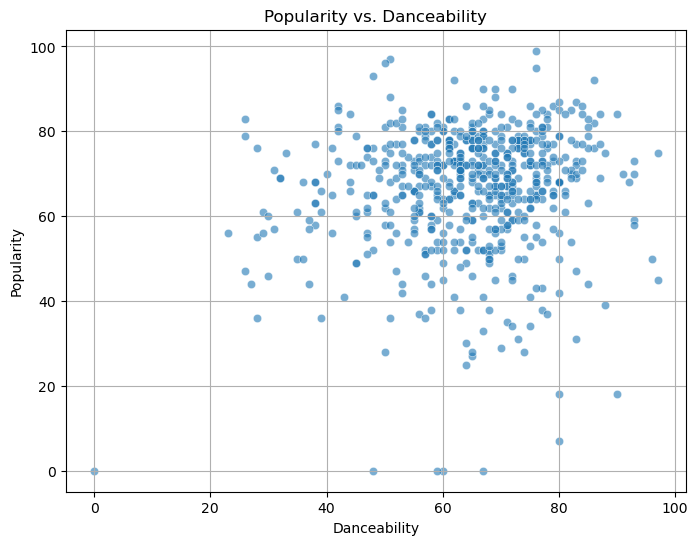

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=all_top_songs, x='dnce', y='pop', alpha=0.6)
plt.title('Popularity vs. Danceability')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

# Does having a higher bpm lead to having a higher energy score?

### To determine the correlation between BPM and energy, I used similar approach as the previous question for popularity vs danceability.

In [51]:
correlation_coefficient = all_top_songs['bpm'].corr(all_top_songs['nrgy'])

print("Correlation coefficient between BPM and energy:", correlation_coefficient)

Correlation coefficient between BPM and energy: 0.12617006494310276


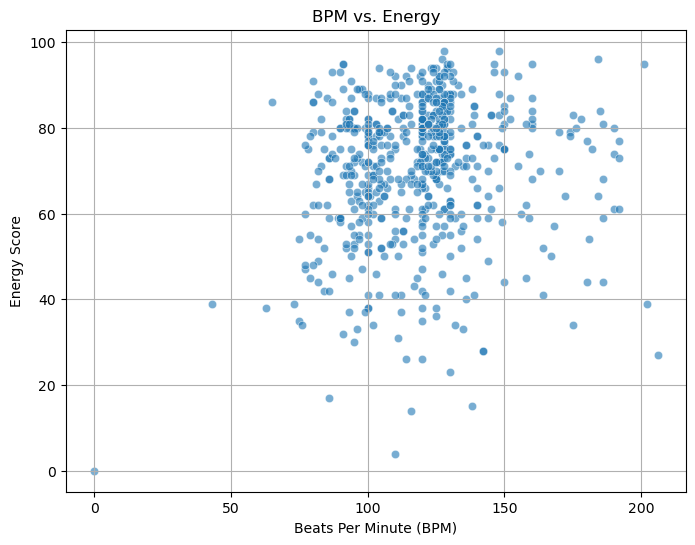

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=all_top_songs, x='bpm', y='nrgy', alpha=0.6)
plt.title('BPM vs. Energy')
plt.xlabel('Beats Per Minute (BPM)')
plt.ylabel('Energy Score')
plt.grid(True)
plt.show()

# Which genre has the highest energy score?

### I first calculated the average energy score for each genre by grouping the dataset by genre and then computing the mean of the 'nrgy' column within each group. Next, I identified the genre with the highest average energy score by finding the genre corresponding to the maximum average energy score. Finally, I reported the genre with the highest average energy score along with its value. This allowed me to determine which genre, on average, had the highest energy score across all songs in the dataset.

In [53]:
average_energy_by_genre = all_top_songs.groupby('top genre')['nrgy'].mean()

highest_energy_genre = average_energy_by_genre.idxmax()
highest_energy_score = average_energy_by_genre.max()

print("Genre with the highest average energy score:", highest_energy_genre)
print("Average energy score:", highest_energy_score)

Genre with the highest average energy score: french indie pop
Average energy score: 89.0


# What percentage of songs may have been recorded live? (Consider anything above 50 in the live column to be recorded live)

### To find the percentage of songs recorded live, I counted the number of songs where the "live" column value was above 50 (indicating a potential live recording). I then divided this count by the total number of songs in the dataset and multiplied by 100 to express the result as a percentage. Finally, I rounded the percentage to two decimal places and printed the result.

In [54]:
live_songs_count = (all_top_songs['live'] > 50).sum()

total_songs_count = len(all_top_songs)

percentage_live_songs = (live_songs_count / total_songs_count) * 100

percentage_live_songs_rounded = round(percentage_live_songs, 2)

print("Percentage of songs recorded live:", percentage_live_songs_rounded)

Percentage of songs recorded live: 2.99


# What percentage of songs were acoustic? (Consider anything above 50 in the acoustic column to be acoustic)

### To calculate the percentage of songs that were acoustic, I followed a similar approach as before.

In [55]:
acoustic_songs_count = (all_top_songs['acous'] > 50).sum()

total_songs_count = len(all_top_songs)

percentage_acoustic_songs = (acoustic_songs_count / total_songs_count) * 100

percentage_acoustic_songs_rounded = round(percentage_acoustic_songs, 2)

print("Percentage of songs that were acoustic:", percentage_acoustic_songs_rounded)

Percentage of songs that were acoustic: 7.3


# Which year’s songs have the highest amount of spoken word in the song?

### To find the year with the highest amount of spoken word in the songs, I first calculated the total spoken word score for each year by summing up the values in the "spch" column for each year. Then, I identified the year with the highest total spoken word score.

In [56]:
spoken_word_by_year = all_top_songs.groupby('year')['spch'].sum()

year_highest_spoken_word = spoken_word_by_year.idxmax()
highest_spoken_word_score = spoken_word_by_year.max()

print("Year with the highest total spoken word score:", year_highest_spoken_word)
print("Highest total spoken word score:", highest_spoken_word_score)

Year with the highest total spoken word score: 2015
Highest total spoken word score: 670
